This code is my implementation / practice corresponding to the following Descriptive Statistics course with Python (in Spanish)

Based in the following YouTube Playlist

https://www.youtube.com/playlist?list=PLxJ3eugu174JqpqulHkIf0wEmA2b5N5DF

In [42]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # charts
import statistics # median, mean, etc.
import requests # For downloading the CSV

**Measures of central tendency and dispersion**

In [43]:
# CSV download
url_amz="https://raw.githubusercontent.com/NechuBM/dataset/main/precios_amazon.csv"
response_amz = requests.get(url_amz)
with open("precios_amazon.csv", "wb") as f:
    f.write(response_amz.content)


url_eth="https://raw.githubusercontent.com/NechuBM/dataset/main/precios_ethereum.csv"
response_eth = requests.get(url_amz)
with open("precios_ethereum.csv", "wb") as f:
    f.write(response_eth.content)

In [44]:
# Load and check the dataframes
df_amz = pd.read_csv('precios_amazon.csv', sep=';', decimal=',')
df_eth = pd.read_csv('precios_ethereum.csv', sep=';', decimal=',')

print(df_amz.describe())
print(df_eth.describe())

              Open         High          Low        Close    Adj Close  \
count   295.000000   295.000000   295.000000   295.000000   295.000000   
mean   3302.138885  3338.047183  3263.254206  3299.830896  3299.839902   
std     195.144908   191.478427   201.148439   197.082087   197.078674   
min    2733.669922  2805.000000  2671.449951  2720.290039  2720.290039   
25%    3185.515015  3230.369995  3158.119995  3192.494995  3192.494995   
50%    3317.000000  3347.800049  3288.899902  3312.530029  3312.530029   
75%    3424.905029  3461.430054  3394.885010  3430.170044  3430.170044   
max    3744.000000  3773.080078  3696.790039  3731.409912  3731.409912   

             Volume  
count  2.950000e+02  
mean   3.472632e+06  
std    1.377987e+06  
min    1.680300e+06  
25%    2.582100e+06  
50%    3.185300e+06  
75%    3.895600e+06  
max    1.267280e+07  
              Open         High          Low        Close    Adj Close  \
count   295.000000   295.000000   295.000000   295.000000   2

In [45]:
print(len(df_amz))
print(df_amz.sample(5))

# Just tell Pandas that we are using day/month/year instead of month/day/year on this DF
df_amz['Date'] = pd.to_datetime(df_amz['Date'], format="%d/%m/%Y")

295
           Date        Open         High          Low        Close  \
266   18/2/2022  3109.98999  3109.989990  3017.860107  3052.030029   
142   24/8/2021  3280.00000  3315.489990  3274.580078  3305.780029   
246   21/1/2022  2999.00000  3018.000000  2841.409912  2852.860107   
70    12/5/2021  3185.00000  3207.939941  3133.100098  3151.939941   
186  26/10/2021  3349.51001  3416.120117  3343.979980  3376.070068   

       Adj Close   Volume  
266  3052.030029  3180200  
142  3305.780029  2551800  
246  2852.860107  8198600  
70   3151.939941  4936400  
186  3376.070068  2698300  


In [46]:
print(len(df_eth))
print(df_eth.sample(5))

# Just tell Pandas that we are using day/month/year instead of month/day/year on this DF
df_eth['Date'] = pd.to_datetime(df_eth['Date'], format="%d/%m/%Y")

295
          Date         Open         High          Low        Close  \
146  30/8/2021  3357.429932  3445.000000  3355.219971  3421.570068   
66    6/5/2021  3270.000000  3314.399902  3247.199951  3306.370117   
173  7/10/2021  3291.540039  3325.750000  3283.060059  3302.429932   
156  14/9/2021  3475.550049  3486.810059  3437.709961  3450.000000   
212  2/12/2021  3460.000000  3492.699951  3423.750000  3437.360107   

       Adj Close   Volume  
146  3421.570068  3192200  
66   3306.370117  4447700  
173  3302.429932  2409100  
156  3450.000000  1936900  
212  3437.360107  3236300  


In [47]:
def discard_days(df, days):
    """ Discard elements from the dataframe if they are included in the days list """
    # Make a copy to prevent changes in the original one
    df_discard = df.copy()
    
    # reset the index
    df_discard.reset_index(inplace=True)

    # modify the format of the data in the column 'Date' to datetime
    df_discard['Date'] = pd.to_datetime(df_discard['Date'])

    # crea una nueva columna con los días de la semana a partir de la columna 'Date'
    df_discard['Day'] = df_discard["Date"].dt.day_name()

    # descartar días que esten en la lista 'days'
    df_discard = df_discard.loc[~df_discard['Day'].isin(days)]

    return df_discard

In [48]:
df_eth_week = discard_days(df_eth, ['Saturday', 'Sunday'])

In [49]:
# We have killed the weekends from the DataFrame
len(df_eth_week) 

# We could also clear the festives in which Amazon is not operating in the stock market... but is not necessary for the purpose of this small exercise

295

In [50]:
# Get Amazon's daily closing price
prices_amz = df_amz['Close'].tolist()
prices_eth = df_eth_week['Close'].tolist()

In [51]:
# Amazon
median_amz = round(statistics.median(prices_amz))
mean_amz = round(statistics.mean(prices_amz))        
print(f"Amazon. Median: {median_amz}, Mean: {mean_amz}")

prices_amz_red = []
for value in prices_amz:
    prices_amz_red.append(round(value))
    


# Ethereum
median_eth = round(statistics.median(prices_eth))
mean_eth = round(statistics.mean(prices_eth))
print(f"Ethereum. Median: {median_eth}, Mean: {mean_eth}")


prices_eth_red = []
for value in prices_eth:
    prices_eth_red.append(round(value))

Amazon. Median: 3313, Mean: 3300
Ethereum. Median: 3313, Mean: 3300


In [52]:
# Just for fun, get the median "manually"
# Amazon's
pric_amz_ord = sorted(prices_amz)
amz_len = round(len(pric_amz_ord) / 2)
median_amz = round(pric_amz_ord[amz_len])
print(f"Amazon's Median: {median_amz}")


# Ethereum's
pric_eth_ord = sorted(prices_eth)
eth_len = round(len(pric_eth_ord) / 2)
median_eth = round(pric_eth_ord[eth_len])
print(f"Ethereum's Median: {median_eth}")

Amazon's Median: 3313
Ethereum's Median: 3313


In [53]:
# Get the mode

mode_amz = statistics.mode(prices_amz_red)
mode_eth = statistics.mode(prices_eth_red)

In [54]:
print(f"Amazon mode: {mode_amz}")
print(f"Ethereum mode: {mode_eth}")

Amazon mode: 3224
Ethereum mode: 3224


In [55]:
# For practice, build a little dataset with all the information and show as a table
table = pd.DataFrame(
    [
        [median_amz, mean_amz, mode_amz],
        [median_eth, mean_eth, mode_eth]
    ],
    index=['AMZ', 'ETH'],
    columns=['Median', 'Mean', 'Mode']
)

print(table)

     Median  Mean  Mode
AMZ    3313  3300  3224
ETH    3313  3300  3224


**Histogram chart**

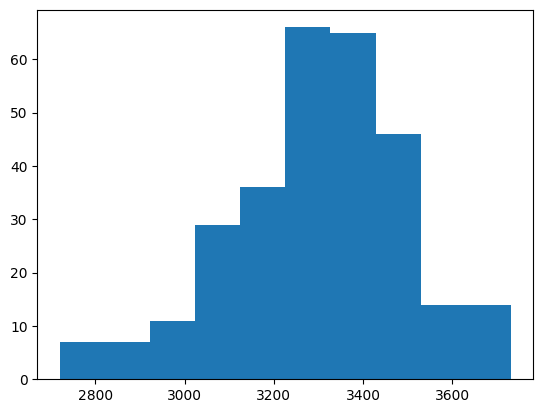

In [56]:
#bin_size = round((max(prices_amz) - min(prices_amz)) / len(prices_amz))
#print(bin_size)
#plt.hist(prices_amz, bins=bin_size)

plt.hist(prices_amz)
plt.show()

Amazon's variance: 38709.683606697006
Ethereum's variance: 38709.683606697006
Amazon's coefficient of variation (CV): 0.05938658812533453
Ethereum's coefficient of variation (CV): 0.05938658812533453


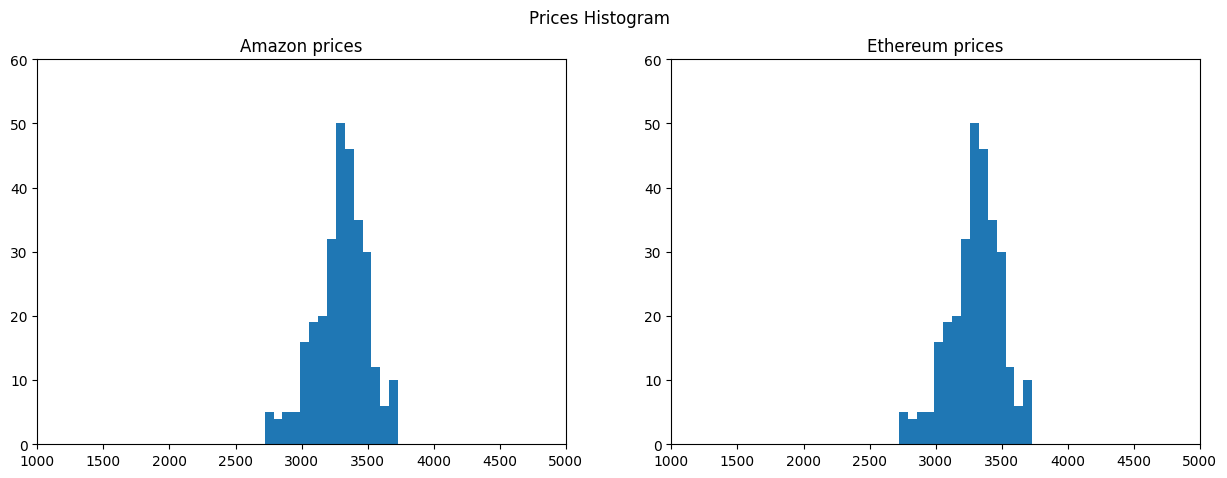

In [57]:
# We set the histograms up in a way that we are comparing them the right way
# without distortions

# 2 histograms is better than one, we use plt.subplots for that purpose
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5)) 
ax1.hist(prices_amz, bins=15)    # AMZ histogram. dataframe, num of bins
ax1.set_title('Amazon prices')   # title
ax1.set_xlim(1000, 5000)         # personalize X rank
ax1.set_ylim(0, 60)              # personalize Y rank

ax2.hist(prices_eth, bins=15)    # ETH histogram
ax2.set_title('Ethereum prices')
ax2.set_xlim(1000, 5000)
ax2.set_ylim(0, 60)

fig.suptitle('Prices Histogram') # just a fancy title

# And there we can see that the AMZ price is much less volatile than ETH
# as the variance will confirm
AMZ_variance = np.var(prices_amz)
print(f"Amazon's variance: {AMZ_variance}")

ETH_variance = np.var(prices_eth)
print(f"Ethereum's variance: {ETH_variance}")

# But never compare variance of numbers with different scales.. 
#(ETH price is very different from AMZ's..)... let's rely on the 
# coefficient of variation (CV = std / mean)
amz_cv = np.sqrt(AMZ_variance) / median_amz
print(f"Amazon's coefficient of variation (CV): {amz_cv}")

eth_cv = np.sqrt(ETH_variance) / median_eth
print(f"Ethereum's coefficient of variation (CV): {eth_cv}")

# Here we can compare apples with apples (AMZ CV = 0.059, ETH CV = 0.29)
# so f**k yeah, ETH has a much higher variance (quite obvious  by now)

**Dispersion measures**
* Maximum
* Minimum
* Third quartile (Q3)
* Second quartile (Q2 - mean)
* First quaritle (Q1)
* Minimum

In [58]:
# Data to play with
data = [110, 105, 100, 840, 95, 100, 120, 250, 12, 9, 12, 33]

# Sort from small to big (not necessary for the numpies methods obviously)
# is just to make comprehensive how it works behind the methods
data.sort()
print(data)

median = np.median(data) # 12 elements, = (100 + 100) / 2 = 100
q1 = np.quantile(data, 0.25, method='midpoint') # (33 + 12) / 2 = 22.5
q3 = np.quantile(data, 0.75, method='midpoint') # (110 + 120) / 2 = 115
data_range = max(data) - min(data)
IQR = q3 - q1

print('Median = Q2: ', median)
print('Max: ', max(data))
print('Min: ', min(data))
print('Q1: ', q1)
print('Q3: ', q3)
print('Range: ', data_range)
print('Interquartile range (IQR) = Q3-Q1: ', IQR)

[9, 12, 12, 33, 95, 100, 100, 105, 110, 120, 250, 840]
Median = Q2:  100.0
Max:  840
Min:  9
Q1:  22.5
Q3:  115.0
Range:  831
Interquartile range (IQR) = Q3-Q1:  92.5


**Boxplot**
* Main box that goes from the inferior limit of Q1 to the upper limit of Q3
* The Median lives between Q1 and Q3 (doesn't need to be exactly in between)
* Whiskers: starts in Q1 till the min value, and in Q3 till the max value
* Otuliers: extra, next steps..

         Min       Q1   Median       Q3          Max
AMZ  2720.29  3192.49  3312.53  3430.17  3731.409912
ETH  2720.29  3192.49  3312.53  3430.17  3731.409912


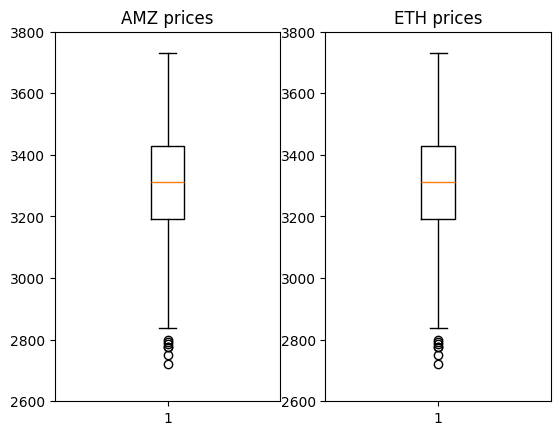

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Let's get the values for both ETH and AMZ
# prices_amz and prices_eth are lists with pricing ranges

# Matplotlib boxplot does the hard work for us
figs, axs = plt.subplots(nrows=1, ncols=2)

y_min = 2600
y_max = 3800

axs[0].boxplot(prices_amz)
axs[0].set_title('AMZ prices')
axs[0].set_ylim(y_min, y_max)
axs[1].boxplot(prices_eth)
axs[1].set_title('ETH prices')
axs[1].set_ylim(y_min, y_max)

# Let's do the calculations "manually" to compare

# median
median_amz = round(np.median(prices_amz), 2)
median_eth = round(np.median(prices_eth), 2)

# min
min_amz = round(min(prices_amz), 2)
min_eth = round(min(prices_eth), 2)

# max
max_amz = max(prices_amz)
max_eth = max(prices_eth)

# Q1 / Q3
q1_amz = round(np.quantile(prices_amz, 0.25, method='midpoint'), 2)
q3_amz = round(np.quantile(prices_amz, 0.75, method='midpoint'), 2)
q1_eth = round(np.quantile(prices_eth, 0.25, method='midpoint'), 2)
q3_eth = round(np.quantile(prices_eth, 0.75, method='midpoint'), 2)

df = pd.DataFrame([
        [min_amz, q1_amz, median_amz, q3_amz, max_amz],
        [min_eth, q1_eth, median_eth, q3_eth, max_eth]
    ],
    columns = ['Min', 'Q1', 'Median', 'Q3', 'Max'],
    index = ['AMZ', 'ETH']
)

print(df)

# The chart confirms the clear concentration of AMZ prices compared to ETH. 
# AMZ appears much more stable, both in terms of total range (max-min) 
# and interquartile range (Q3−Q1). 
# We'll handle the outliers later on.

**Outliers**

In [60]:
# Interquartile Range (IQR)
amz_IQR = q3_amz - q1_amz
eth_IQR = q3_eth - q1_eth

# Lower mild fence (boundary for mild outliers on the lower side)
amz_iqr_lowerbound = q1_amz - 1.5 * amz_IQR
eth_iqr_lowerbound = q1_eth - 1.5 * eth_IQR

def printLBOutliers(prices, lowerMildFence):
    outliers_lower_inf = []
    
    for price in prices:
        if price < lowerMildFence:
            outliers_lower_inf.append(price)

    return outliers_lower_inf


print("Lower mild fence (AMZ): ", printLBOutliers(prices_amz, amz_iqr_lowerbound))
print("Lower mild fence (ETH): ", printLBOutliers(prices_eth, eth_iqr_lowerbound))

# Upper mild fence (boundary for mild outliers on the upper side)
amz_iqr_upperbound = q3_amz + 1.5 * amz_IQR
eth_iqr_upperbound = q3_eth + 1.5 * eth_IQR

def printUPOutliers(prices, upperMildFence):
    outliers_upper_inf = []
    
    for price in prices:
        if price > upperMildFence:
            outliers_upper_inf.append(price)

    return outliers_upper_inf

print("Upper mild fence (AMZ): ", printUPOutliers(prices_amz, amz_iqr_upperbound))
print("Upper mild fence (ETH): ", printUPOutliers(prices_eth, eth_iqr_upperbound))

# Which makes sense with the boxplots above

Lower mild fence (AMZ):  [2799.719971, 2777.449951, 2792.75, 2776.909912, 2749.060059, 2720.290039, 2785.580078]
Lower mild fence (ETH):  [2799.719971, 2777.449951, 2792.75, 2776.909912, 2749.060059, 2720.290039, 2785.580078]
Upper mild fence (AMZ):  []
Upper mild fence (ETH):  []
